In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Aim is to predict the marks of students of the test data

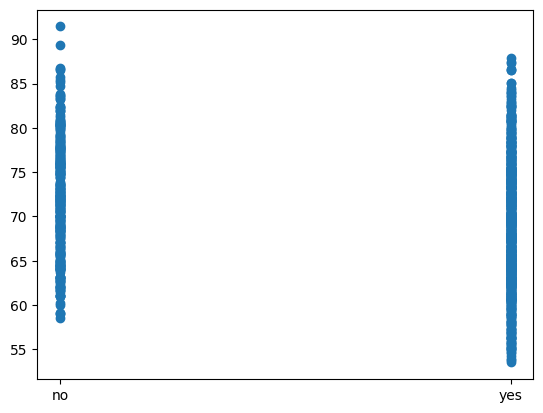

In [15]:
# Use the file namd 'training data' to train the model

data = pd.read_excel('/content/Training data.xlsx')
x_train = np.array(data.iloc[:,0:8])
y_train = np.array(data.iloc[:,8]).reshape(-1,1)

# Try plotting y_train with different features
# To get an idea whether to add some features or not
# Add some features if required in x_train

# Also do label encoding for features not represented in numbers
# refer the link if not know : https://youtu.be/589nCGeWG1w?si=t2Wa7LgbUOO4RooM

def feature_changing(x_train):
  # ---------
    plt.plot(x_train[:,0],y_train,'o')
    plt.show()
  # ---------
    return x_train

x_train = feature_changing(x_train)

In [16]:
def z_score(x_train):

  # ---------
    x_mean = np.mean(x_train,axis=0)
    x_std = np.std(x_train,axis=0)
    x_train = (x_train - x_mean)/x_std
  # ---------

    return x_train,x_std,x_mean

In [17]:
def cost(x_train,y_train,w,b):

  # ---------
    y_predict = np.dot(x_train,w) + b
    loss = np.mean((y_predict - y_train)**2)
    # Use mean square error as cost function
    # return cost
  # ---------

    return loss

In [18]:
def gradient_descent(x_train,y_train,w,b):

  # ---------
    x_train = np.insert(x_train,0,1,axis=1)
    y_predict = np.dot(x_train,w) + b
    dw = np.dot(x_train.T,(y_predict - y_train))
    db = np.mean(y_predict - y_train)
    # Choose learning rate yourself
  # ---------

    return w,b

ValueError: x and y must have same first dimension, but have shapes (200,) and (1000, 1)

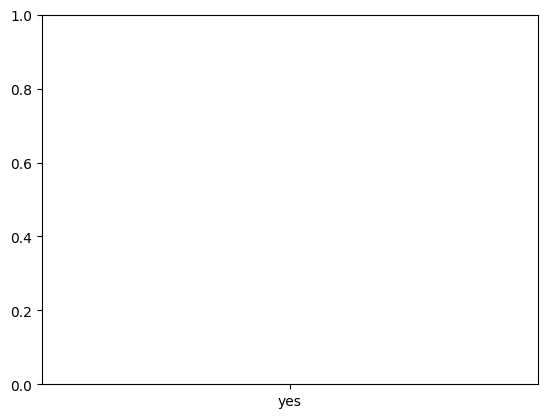

In [27]:
x_train = x_train.astype(np.float64)
x_train,x_std,x_mean = z_score(x_train)

np.random.seed(2147483647)
w = np.random.randn(x_train.shape[1],1)
b = np.random.randn(1)

old_cost = 0

while abs(old_cost - cost(x_train,y_train,w,b))>0.00001:
  old_cost = cost(x_train,y_train,w,b)
  w,b = gradient_descent(x_train,y_train,w,b)

x_predict = pd.read_excel('/content/Test data.xlsx').iloc[:,:8].to_numpy()
x_predict = feature_changing(x_predict)
x_predict = (x_predict - x_mean)/x_std
ans = pd.read_excel('/content/Test data.xlsx').iloc[:,8].to_numpy()

y_predict = np.dot(x_predict,w) + b

accuracy = 0
for dim in range(len(ans)):
  if abs(y_predict[dim]-ans[dim])<0.5: # do not change the tolerance as you'll be checked on +- 0.5 error only
    accuracy += 1
accuracy = round(accuracy*100/200.0,2)
ok = 'Congratulations' if accuracy>95 else 'Optimization required'
print(f"{ok}, your accuracy is {accuracy}%")